Edwin Jesús Kato Montelongo 9Y

# Librerías y csv

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


# Explorar datos

In [7]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
print(datos.dtypes)
datos[['TV','Radio', 'Newspaper', 'Web', 'Sales', ]].describe()

Observaciones y variables:  (200, 7)
Columnas y tipo de dato
Unnamed: 0      int64
X               int64
TV            float64
Radio         float64
Newspaper     float64
Web           float64
Sales         float64
dtype: object


,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


## Dispersión de la variables con respecto a Sales

c:\Users\katod\Documents\Escuela\.venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


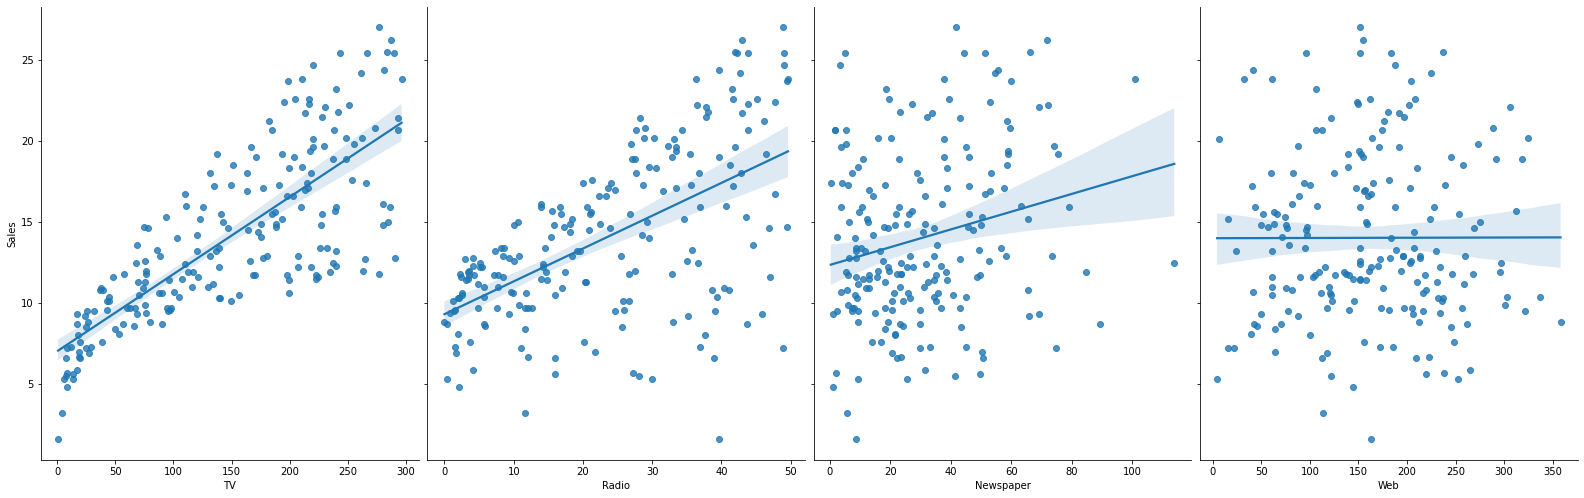

In [8]:
sns.pairplot(datos, x_vars=['TV','Radio','Newspaper', 'Web'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')

# Limpiar datos

## Identificar variables independientes y dependiente

### Variables independientes

In [12]:
X_independientes = datos.iloc[:,2:6]
X_independientes

,TV,Radio,Newspaper,Web
0,230.1,37.8,69.2,306.634752
1,44.5,39.3,45.1,302.653070
2,17.2,45.9,69.3,49.498908
3,151.5,41.3,58.5,257.816893
4,180.8,10.8,58.4,195.660076
...,...,...,...,...
195,38.2,3.7,13.8,248.841073
196,94.2,4.9,8.1,118.041856
197,177.0,9.3,6.4,213.274671
198,283.6,42.0,66.2,237.498063


### Variable dependiente

In [13]:
Y_dependiente = datos.iloc[:, 6:7]
Y_dependiente

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# Datos de entrenamiento y datos de validación

In [26]:
X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1550)

## Datos de entrenamiento

Estructura de datos de entrenamiento

In [27]:
X_entrena

,TV,Radio,Newspaper,Web
53,182.6,46.2,58.7,176.050052
145,140.3,1.9,9.0,231.883385
54,262.7,28.8,15.9,324.615179
90,134.3,4.9,9.3,258.355488
52,216.4,41.7,39.6,161.802512
...,...,...,...,...
15,195.4,47.7,52.9,148.095134
181,218.5,5.4,27.4,162.387486
137,273.7,28.9,59.7,288.260611
25,262.9,3.5,19.5,160.562859


In [28]:
print(X_entrena[['TV']], X_entrena[['Radio']], X_entrena[['Newspaper']])

        TV
53   182.6
145  140.3
54   262.7
90   134.3
52   216.4
..     ...
15   195.4
181  218.5
137  273.7
25   262.9
74   213.4

[140 rows x 1 columns]      Radio
53    46.2
145    1.9
54    28.8
90     4.9
52    41.7
..     ...
15    47.7
181    5.4
137   28.9
25     3.5
74    24.6

[140 rows x 1 columns]      Newspaper
53        58.7
145        9.0
54        15.9
90         9.3
52        39.6
..         ...
15        52.9
181       27.4
137       59.7
25        19.5
74        13.1

[140 rows x 1 columns]


# Modelo de Regresión lineal múltiple

In [29]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

## Evaluación del modelo antes de predicciones


Intercepción o b0

In [30]:
b0 = modelo_rm.intercept_
print (b0,"\n")
print ("Coeficientes: b1, b2, b3 y b4\n") 
b1 = modelo_rm.coef_[0, 0:1]
b2 = modelo_rm.coef_[0, 1:2]
b3 = modelo_rm.coef_[0, 2:3]
b4 = modelo_rm.coef_[0, 3:4]
print (b1, b2, b3, b4)

[1.99840102] 

Coeficientes: b1, b2, b3 y b4

[0.04634942] [0.18955467] [-0.00237538] [0.00458974]


## R Square y R Square ajustado a a partir del modelo

In [31]:
print(modelo_rm.score(X_entrena, Y_entrena))

0.8944214768940416


# Predicciones

In [32]:
predicciones = modelo_rm.predict(X_valida)
print(predicciones[:-1])

[[ 4.89361183]
 [11.5940179 ]
 [22.60659292]
 [ 7.38981773]
 [20.0751711 ]
 [19.9399668 ]
 [23.1054774 ]
 [14.58252517]
 [24.01703521]
 [18.20588954]
 [19.21599579]
 [10.01427718]
 [ 9.79944302]
 [21.37700947]
 [17.1200838 ]
 [ 4.71413713]
 [ 6.12624889]
 [18.44920897]
 [21.22998029]
 [24.03719819]
 [ 4.32152288]
 [14.96934023]
 [14.97563558]
 [ 7.90268906]
 [14.59261863]
 [14.59782493]
 [ 7.35819485]
 [14.76449044]
 [18.08531025]
 [ 9.5571743 ]
 [11.95786674]
 [19.37349854]
 [17.68206061]
 [12.22520364]
 [ 9.89283182]
 [13.57989982]
 [14.54408427]
 [21.17752631]
 [20.17708344]
 [13.58321626]
 [13.9134238 ]
 [12.31282871]
 [11.79584423]
 [ 6.51551982]
 [15.52798958]
 [12.17490311]
 [14.305473  ]
 [ 6.73174986]
 [20.53807578]
 [ 8.63124757]
 [ 8.77106998]
 [13.18487438]
 [ 9.28350804]
 [16.12784983]
 [ 6.31221702]
 [17.06441816]
 [ 7.83818563]
 [ 5.24484155]
 [10.704502  ]]


In [33]:
print(predicciones.shape)

(60, 1)


# Evaluar predicciones

In [36]:
# print(type(X_valida))
# print(type(predicciones))
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Sales_Real = Y_valida)
comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())
print(comparaciones)

        TV  Radio  Newspaper         Web  Sales_Real   Predicho
155    4.1   11.6        5.7  113.270712         3.2   4.893612
5      8.7   48.9       75.0   22.072395         7.2  11.594018
17   281.4   39.6       55.8   41.755313        24.4  22.606593
107   90.4    0.3       23.2  261.380879         8.7   7.389818
28   248.8   27.1       22.9  318.644967        18.9  20.075171
176  248.4   30.2       20.3  163.852044        20.2  19.939967
61   261.3   42.7       54.7  224.832039        24.2  23.105477
81   239.8    4.1       36.9  169.946395        12.3  14.582525
183  287.6   43.0       71.8  154.309725        26.2  24.017035
141  193.7   35.4       75.6  152.284937        19.2  18.205890
133  219.8   33.5       45.1  171.478018        19.6  19.215996
18    69.2   20.5       18.3  210.489910        11.3  10.014277
157  149.8    1.3       24.3  145.803211        10.1   9.799443
55   198.9   49.4       60.0  204.418927        23.7  21.377009
41   177.0   33.4       38.7  147.859324

## RMSE

In [39]:
print('Mean Squared Error: MSE', metrics.mean_squared_error(Y_valida, predicciones), "\n")
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones)))

Mean Squared Error: MSE 2.8182280069449197 

Root Mean Squared Error RMSE: 1.678757876212326


# Interpretación

### ¿Cuál es el contexto de los datos?


Una empresa necesita conocer la relación de sus ventas con la cantidad de dinero invertido en distintos medios.



### ¿Cuántas observaciones se analizan y cuáles son las variables de interés?


Se tiene un total de 200 observaciones. Las variables de interés son TV, Radio, Newspaper, Web y Sales.



### ¿Cuáles son las variables independientes y dependientes?


Las variables independientes son TV, Radio, Newspaper y Web, la variable dependiente es Sales.



### ¿Cuál es el porcentaje de datos de entrenamiento y datos de validación ?



Se entrenará y validará con un 30% y 70% de los datos para el entrenamiento y la validación, respectivamente. La semilla a utilizar es 1550.



### ¿Son los coeficientes confiables al menos al 90% para hacer predicciones?

TV, Radio y Web tienen una confiabilidad mayor al 90%



### ¿Cuál nivel de confianza para cada coeficiente?



TV: 0.046002 con un 99.9999% Radio: 0.204716 con un 99.9999% Newspaper: 0.004891 con un 58.639% Web: 0.005880 con un 99.8925%



### ¿Que valor tiene el estadístico el R Square ajustado y que representa o qué significa?



Tiene un valor de 0.8944214768940416, el cual significa que el modelo tiene una certeza del ~89.442%, el cual es una cifra muy aceptable.



### ¿Cuál es el valor de RMSE y qué significaría este valor



Tiene un valor de 1.678757876212326 y representa la cantidad de dispersión posible de entre los datos presentados.



### ¿Puede haber otro modelo más óptimo para estos datos?



Sí, este bien podría ser una regresión lineal múltiple con más de una variable dependiente o más variables independientes.



### ¿Que tan confiables son las predicciones con datos nuevos con este modelo y con estos datos?



Según los datos de correlación, el R Square y el RMSE, puedo concluir que este modelo, con la semilla 1550, tiene un grado de certeza muy alto, perfecto para su posterior uso en predicciones, simulaciones, etc.

### Comparado con el modelo elaborado en lenguaje R cual tiene menor rmse y qué significa?

Utilizando Python, logro tener un menor índice de dispersión (1.678757876212326) que el que obtuve en RStudio (1.980575), esto significa que, las predicciones de datos entrenados en Python, tienden a tener una menor dispersión, que aquellos obtenidos en R. 